# Telecom Users - Churn Prediction

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:

- Description of the data (with the calculation of basic statistics);
- Research of dependencies and formulation of hypotheses;
- Building models for predicting the outflow (with justification for the choice of a particular model) based on tested hypotheses and identified relationships;
- Comparison of the quality of the obtained models.

## Library imports

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

## Load Dataset and Validate Data load

In [45]:
# Load the dataset

telecomChurn = pd.read_csv("resources/telecom_users.csv")
telecomChurn.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [46]:
# check the data structure
telecomChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [47]:
# Check for any missing values
telecomChurn.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in the dataset

## Exploratory Data Analysis

No     4399
Yes    1587
Name: Churn, dtype: int64


The numbr of churns is 26.511861009021047 % of total


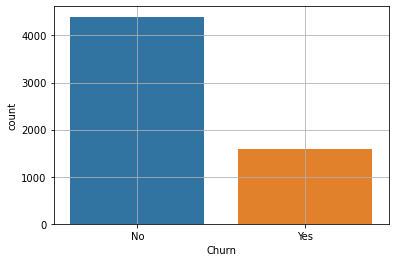

In [48]:
# Explore the response variable

sns.countplot(x='Churn', data=telecomChurn)
plt.grid()
print(telecomChurn['Churn'].value_counts())
print("\n")
print(f"The numbr of churns is {telecomChurn['Churn'].value_counts()[1]/len(telecomChurn)*100} % of total")

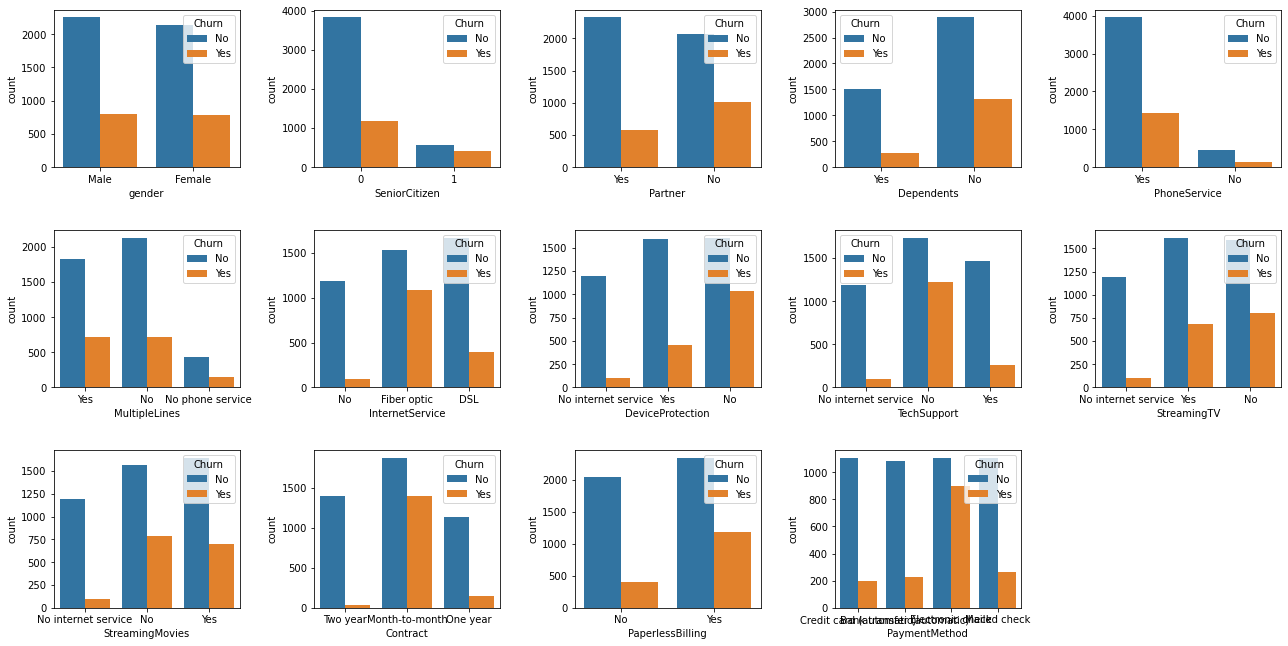

In [49]:
# Visualize the categorical variables

fig = plt.figure(figsize=(22, 11))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(3, 5, 1)
sns.countplot(x='gender', hue='Churn', data=telecomChurn, ax=ax)
ax = fig.add_subplot(3, 5, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=telecomChurn, ax=ax)
ax = fig.add_subplot(3, 5, 3)
sns.countplot(x='Partner', hue='Churn', data=telecomChurn, ax=ax)
ax = fig.add_subplot(3, 5, 4)
sns.countplot(x='Dependents', hue='Churn', data=telecomChurn, ax=ax)
ax = fig.add_subplot(3, 5, 5)
sns.countplot(x='PhoneService', hue='Churn', data=telecomChurn, ax=ax)
ax = fig.add_subplot(3, 5, 6)
sns.countplot(x='MultipleLines', hue='Churn', data=telecomChurn, ax=ax)
ax = fig.add_subplot(3, 5, 7)
sns.countplot(x='InternetService', hue='Churn', data=telecomChurn, ax=ax)
ax = fig.add_subplot(3, 5, 8)
sns.countplot(x='DeviceProtection', hue='Churn', data=telecomChurn, ax=ax)
ax = fig.add_subplot(3, 5, 9)
sns.countplot(x='TechSupport', hue='Churn', data=telecomChurn, ax=ax)
ax = fig.add_subplot(3, 5, 10)
sns.countplot(x='StreamingTV', hue='Churn', data=telecomChurn, ax=ax)
ax = fig.add_subplot(3, 5, 11)
sns.countplot(x='StreamingMovies', hue='Churn', data=telecomChurn, ax=ax)
ax = fig.add_subplot(3, 5, 12)
sns.countplot(x='Contract', hue='Churn', data=telecomChurn, ax=ax)
ax = fig.add_subplot(3, 5, 13)
sns.countplot(x='PaperlessBilling', hue='Churn', data=telecomChurn, ax=ax)
ax = fig.add_subplot(3, 5, 14)
sns.countplot(x='PaymentMethod', hue='Churn', data=telecomChurn, ax=ax)
plt.show()

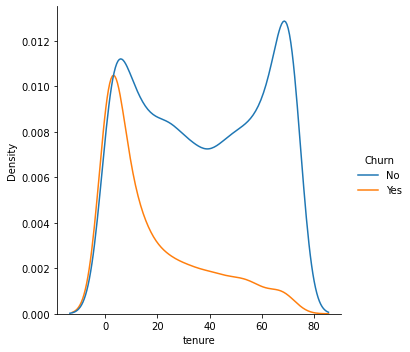

In [50]:
# Understand the tenure with respect to Churn
sns.displot(data=telecomChurn, x="tenure", hue="Churn", kind='kde')

Churn
No     37.599682
Yes    18.246377
Name: tenure, dtype: float64

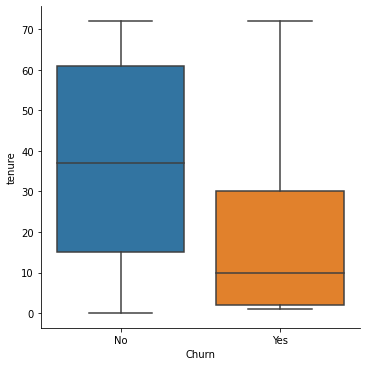

In [51]:
# Understand the average tenure
sns.catplot(x="Churn", y="tenure", kind="box", data=telecomChurn)

telecomChurn.groupby("Churn").mean()['tenure']

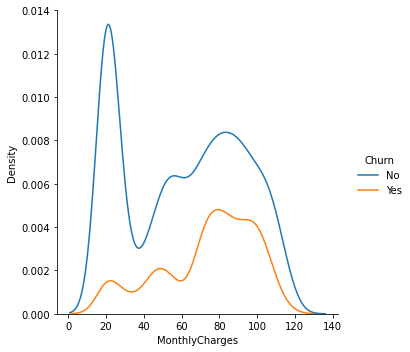

In [52]:
# Understand the MonthlyCharges with respect to Churn
sns.displot(data=telecomChurn, x="MonthlyCharges", hue="Churn", kind='kde')

Churn
No     61.424506
Yes    74.164871
Name: MonthlyCharges, dtype: float64

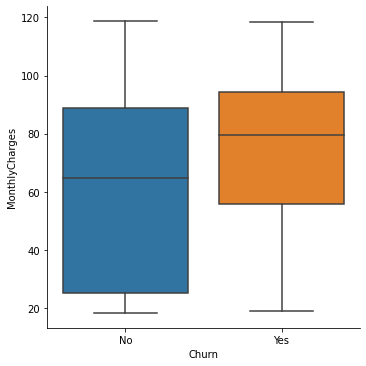

In [53]:
# Understand the average MonthlyCharges
sns.catplot(x="Churn", y="MonthlyCharges", kind="box", data=telecomChurn)

# Understand the average MonthlyCharges
telecomChurn.groupby("Churn").mean()['MonthlyCharges']

In [54]:
# We will convert the TotalCharges column to numeric .. The blank entries will be coerced to NaN..
telecomChurn['TotalCharges'] = pd.to_numeric(telecomChurn['TotalCharges'], errors='coerce')

In [55]:
# we will check all the rows where TotalCharges column is NaN

telecomChurn[telecomChurn['TotalCharges'].isna()]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


** It is observed thst TotalCharges column is NaN for those customers, whose tenure is 0, which means customer who have not completed one month, there has not been any charge made to the customer. We can handle this NaN in two ways
- We made all of them as 0.0 (since no billing has happened yet) - Hence there are no charges to the customer
- OR, we can made the TotalCharges of these rows to be equal to MonthlyCharges as the same will be billed towards end of the month"

These are situations where we need a SME/Domain Expert to provide guidance 

For now we proceed on to make these values as 0.0 **

In [56]:
telecomChurn['TotalCharges'] = telecomChurn['TotalCharges'].replace(np.nan, 0, regex=True)

## Extracting Feautures, Target and Train-Test Split

### Preparing features for Modelling

In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [58]:
telecomChurn['gender'] = label_encoder.fit_transform(telecomChurn['gender'])                                        # Gender
telecomChurn['Partner'] = label_encoder.fit_transform(telecomChurn['gender'])                                       # Partner
telecomChurn['Dependents'] = label_encoder.fit_transform(telecomChurn['gender'])                                    # Dependents
telecomChurn['PhoneService'] = label_encoder.fit_transform(telecomChurn['PhoneService'])                            # PhoneService
telecomChurn['MultipleLines'] = telecomChurn['MultipleLines'].apply(lambda x : 1 if x == 'Yes' else 0)              # MultipleLines
telecomChurn['InternetService'] = telecomChurn['InternetService'].apply(lambda x : 0 if x == 'No' else 1)           # Internet Service
telecomChurn['OnlineSecurity'] = telecomChurn['OnlineSecurity'].apply(lambda x : 1 if x == 'Yes' else 0)            # OnlineSecurity
telecomChurn['OnlineBackup'] = telecomChurn['OnlineBackup'].apply(lambda x : 1 if x == 'Yes' else 0)                # OnlineBackup
telecomChurn['DeviceProtection'] = telecomChurn['DeviceProtection'].apply(lambda x : 1 if x == 'Yes' else 0)        # DeviceProtection
telecomChurn['TechSupport'] = telecomChurn['TechSupport'].apply(lambda x : 1 if x == 'Yes' else 0)                  # TechSupport
telecomChurn['StreamingTV'] = telecomChurn['StreamingTV'].apply(lambda x : 1 if x == 'Yes' else 0)                  # StreamingTV
telecomChurn['StreamingMovies'] = telecomChurn['StreamingMovies'].apply(lambda x : 1 if x == 'Yes' else 0)          # DeviceProtection
telecomChurn['Contract'] = label_encoder.fit_transform(telecomChurn['Contract'])                                    # Contract
telecomChurn['PaperlessBilling'] = label_encoder.fit_transform(telecomChurn['PaperlessBilling'])                    # PaperlessBilling
telecomChurn['PaymentMethod'] = label_encoder.fit_transform(telecomChurn['PaymentMethod'])                          # PaymentMethod
telecomChurn['Churn'] = label_encoder.fit_transform(telecomChurn['Churn'])                                          # Churn

In [59]:
telecomChurn.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,1,0,1,1,72,1,1,0,...,0,0,0,0,2,0,1,24.10,1734.65,0
1,4528,9688-YGXVR,0,0,0,0,44,1,0,1,...,1,0,1,0,0,1,1,88.15,3973.20,0
2,6344,9286-DOJGF,0,1,0,0,38,1,1,1,...,0,0,0,0,0,1,0,74.95,2869.85,1
3,6739,6994-KERXL,1,0,1,1,4,1,0,1,...,0,0,0,1,0,1,2,55.90,238.50,0
4,432,2181-UAESM,1,0,1,1,2,1,0,1,...,1,0,0,0,0,0,2,53.45,119.50,0


In [60]:
# Extract features and target

features = telecomChurn.drop(labels=["Unnamed: 0", "customerID", "Churn"], axis=1)
target = telecomChurn['Churn']

In [61]:
# Check the feautures set
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,72,1,1,0,0,0,0,0,0,0,2,0,1,24.10,1734.65
1,0,0,0,0,44,1,0,1,0,1,1,0,1,0,0,1,1,88.15,3973.20
2,0,1,0,0,38,1,1,1,0,0,0,0,0,0,0,1,0,74.95,2869.85
3,1,0,1,1,4,1,0,1,0,0,0,0,0,1,0,1,2,55.90,238.50
4,1,0,1,1,2,1,0,1,1,0,1,0,0,0,0,0,2,53.45,119.50


In [62]:
# Perform Train-test split

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.3, random_state=101,
                                                                           stratify = target)

## Random Forest Classifier

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# We will run it on a grid, to see the best params
param_grid = {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False], 
              'criterion':['entropy', 'gini']}
rfcgrid = GridSearchCV(RandomForestClassifier(random_state=101), param_grid, verbose=100, cv=10, n_jobs=-2)
rfcgrid.fit(features_train, target_train)

print(f"The best params - {rfcgrid.best_params_}")

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-2,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100, 200]},
             verbose=100)

In [65]:
# Run the prediction and check evaluation metrics

from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, balanced_accuracy_score

rfcpredictions = rfcgrid.predict(features_test)

print("Confusion Matrix - Random Forest Using Entropy Index")
print(confusion_matrix(target_test,rfcpredictions))
print("\n")
print("Accuracy Score - Random Forest")
print(accuracy_score(target_test, rfcpredictions))
print("\n")
print("Classification Report - Random Forest")
print(classification_report(target_test,rfcpredictions))
print("\n")
print("F1 Score - Random Forest")
print(f1_score(target_test, rfcpredictions))

Confusion Matrix - Random Forest Using Entropy Index
[[1179  141]
 [ 241  235]]


Accuracy Score - Random Forest
0.7873051224944321


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1320
           1       0.62      0.49      0.55       476

    accuracy                           0.79      1796
   macro avg       0.73      0.69      0.71      1796
weighted avg       0.78      0.79      0.78      1796



F1 Score - Random Forest
0.5516431924882629


## XGBoost Classifier

In [66]:
from xgboost import XGBClassifier

param_grid = {'n_estimators':[50, 100, 200, 300], 'max_depth' : [3, 4, 5], 'learning_rate':[0.001, 0.01, 0.1, 1, 10]}
xggrid = GridSearchCV(XGBClassifier(objective = 'binary:logistic', random_state = 101), param_grid, verbose=1, cv=10, n_jobs=-2)
xggrid.fit(features_train, target_train)

print(f"The best params are {xggrid.best_params_}")

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[18:50:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The best params are {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [67]:
xggrid_predictions = xggrid.predict(features_test)

print("Confusion Matrix")
print(confusion_matrix(target_test, xggrid_predictions))
print("\n")
print("Accuracy Score")
print(accuracy_score(target_test, xggrid_predictions))
print("\n")
print("Classification Report")
print(classification_report(target_test, xggrid_predictions))
print("F1 Score \n")
print(f1_score(target_test, xggrid_predictions))

Confusion Matrix
[[1176  144]
 [ 218  258]]


Accuracy Score
0.7984409799554566


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1320
           1       0.64      0.54      0.59       476

    accuracy                           0.80      1796
   macro avg       0.74      0.72      0.73      1796
weighted avg       0.79      0.80      0.79      1796

F1 Score 

0.5876993166287016


## Gaussian Naive Bayes Classifier

In [68]:
from sklearn.naive_bayes import GaussianNB

# Build the Model
gaussianNBClassifier = GaussianNB()
gaussianNBClassifier.fit(features_train, target_train)

GaussianNB()

In [69]:
predictionsGaussianNB = gaussianNBClassifier.predict(features_test)
print("Confusion Matrix - GaussianNB")
print(confusion_matrix(target_test, predictionsGaussianNB))
print("\n")
print("Accuracy Score - GaussianNB")
print(accuracy_score(target_test, predictionsGaussianNB))
print("\n")
print("Classification Report - GaussianNB")
print(classification_report(target_test, predictionsGaussianNB))
print("F1 Score \n")
print(f1_score(target_test, predictionsGaussianNB))

Confusion Matrix - GaussianNB
[[978 342]
 [111 365]]


Accuracy Score - GaussianNB
0.7477728285077951


Classification Report - GaussianNB
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1320
           1       0.52      0.77      0.62       476

    accuracy                           0.75      1796
   macro avg       0.71      0.75      0.71      1796
weighted avg       0.80      0.75      0.76      1796

F1 Score 

0.6170752324598479


## Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

param_grid = {'solver':['lbfgs', 'liblinear']}
logmodel = GridSearchCV(LogisticRegression(), param_grid, verbose=1, cv=10, n_jobs=-2)
logmodel.fit(features_train, target_train)

print(f"The best params - {logmodel.best_params_}")

Fitting 10 folds for each of 2 candidates, totalling 20 fits
The best params - {'solver': 'liblinear'}


In [72]:
logisticPredictions = logmodel.predict(features_test)

print("Confusion Matrix")
print(confusion_matrix(target_test, logisticPredictions))
print("\n")
print("Accuracy Score")
print(accuracy_score(target_test, logisticPredictions))
print("\n")
print("Classification Report")
print(classification_report(target_test, logisticPredictions))
print("F1 Score \n")
print(f1_score(target_test, logisticPredictions))

Confusion Matrix
[[1168  152]
 [ 208  268]]


Accuracy Score
0.799554565701559


Classification Report
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1320
           1       0.64      0.56      0.60       476

    accuracy                           0.80      1796
   macro avg       0.74      0.72      0.73      1796
weighted avg       0.79      0.80      0.80      1796

F1 Score 

0.5982142857142857


## Conclusion

LogisticRegression has performed the best with higher precision on classifying the Churn and also a F1 score of 0.6. This is followed by XGBoost

The overall accuracy touches at 80%